# Table Of Contents

>[Table Of Contents](#scrollTo=ChNBPwT4pDZA)

>[Import Libraries & Load The Dataset](#scrollTo=HasLatdBFx2D)

>[Part1) EDA](#scrollTo=qKpTplrNF_CK)

>>[Fixing the Date column](#scrollTo=VYA55l5viUcy)

>>[Correlation (Part 1: Before Feature Engineering)](#scrollTo=s1UCBUNrxU0D)

>>[Dataset Shape & Features](#scrollTo=8vtAcq_pGAvJ)

>>[Checking Outliers](#scrollTo=MXJDX1SWHXcR)

>>[Feature Engineering](#scrollTo=XlHezjT2ozuf)

>>>[BMI](#scrollTo=-prKVErMw6ly)

>>>[Sleep Quality](#scrollTo=ORy_NgBFy4m0)

>>>[Physical Health](#scrollTo=6EDBM1MD81I9)

>>>[Glucose Management Score](#scrollTo=ukT0jBdjDPcp)

>>[Correlation (Part2: After Feature Engineering)](#scrollTo=ZxRZkPYkAOr4)

>>[Visualization](#scrollTo=QiVN9xb2DcZQ)

>>[Normalization(Z-Score)](#scrollTo=U4cEn2uLle7_)

>[Part2) Linear Regression](#scrollTo=Y-4ZbEZDLeJS)

>>[Linear Regression(First Try)](#scrollTo=9KFBGxTCMGa3)

>>[Linear Regression(Second Try)](#scrollTo=QylkTJPwVpEh)

>>[Ridge](#scrollTo=JcL84YhEWY99)

>>>[First Try](#scrollTo=QKEPh2jAyRNW)

>>>[Second Try](#scrollTo=oXuxh3LByg7C)

>>[PCA](#scrollTo=CNqTrgyNWiaC)

>>>[Determine the best N for the dataset](#scrollTo=IpQ7bXtH9jMw)

>>>[Create A Regression Model On New Features](#scrollTo=Bdni82fx9qaY)

>[Part3) Logistic Regression](#scrollTo=4TaVEPwAAiS5)

>>[Binary Classification](#scrollTo=CEVaSXvyArte)

>>>[First Try](#scrollTo=YU_MUyyuJux4)

>>>[Second Try](#scrollTo=ik-oaHx0MvsR)

>[Part4) Random Forest & Decision Tree](#scrollTo=c7MIZNkLNuU4)

>>[Decision Tree](#scrollTo=rRUNOzxxtFs4)

>>>[Part 1 => max depth = 3](#scrollTo=ccbIsGTnoKI-)

>>>[Part 2 => max depth = 5](#scrollTo=QXQizjl-no2N)

>>>[Part 3 => max depth = 10](#scrollTo=CDl8_3i1nvXU)

>>>[Part 5 => max depth = 15](#scrollTo=UuWMSygnolEF)

>>[Random Forest](#scrollTo=0uRfIMPltIhp)

>[SVM & Cross Validation](#scrollTo=ahhw1LReyShV)

>>[Support Vector Machine (SVM)](#scrollTo=3s_bYcNrzP-H)

>>>[Kernel => Linear](#scrollTo=qQ__jg1BzX4G)

>>>[Kernel => Polynomial](#scrollTo=6gouZkulzj0m)

>>>[Kernel => RBF](#scrollTo=AXc2qZ44z7TO)



# Import Libraries & Load The Dataset

In [60]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Uni_Sem01/Assignment02/Final Dataset.csv')
dataset

,UserID,Date,Weight,Height,BloodGlucose,PhysicalActivity,Diet,MedicationAdherence,StressLevel,SleepHours,HydrationLevel,RiskScore
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,4.717234
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-12-26,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,17.357712
996,997,2023-12-27,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,73.000000
997,998,2023-12-28,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,70.921787
998,999,2023-12-29,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,10.000000


# Part1) EDA

## Fixing the Date column

In [3]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [4]:
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

In [5]:
dataset = dataset.drop('Date', axis=1)

In [6]:
dataset

,UserID,Weight,Height,BloodGlucose,PhysicalActivity,Diet,MedicationAdherence,StressLevel,SleepHours,HydrationLevel,RiskScore,Year,Month,Day
0,1,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,38.000000,2021,1,1
1,2,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,39.162310,2021,1,2
2,3,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,31.481633,2021,1,3
3,4,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,45.000000,2021,1,4
4,5,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,4.717234,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,17.357712,2023,12,26
996,997,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,73.000000,2023,12,27
997,998,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,70.921787,2023,12,28
998,999,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,10.000000,2023,12,29


## Correlation (Part 1: Before Feature Engineering)

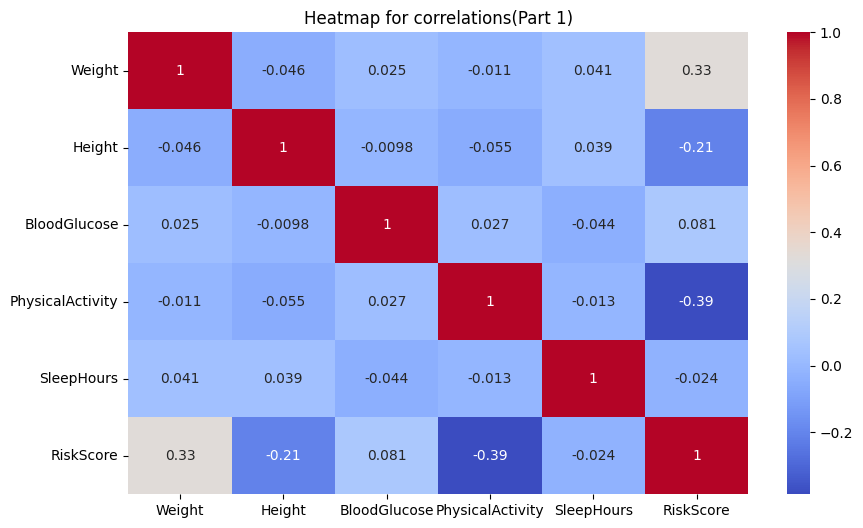

In [7]:
temp_df = dataset.drop(["UserID", "Diet", "HydrationLevel", "StressLevel", "MedicationAdherence", "Year", "Month", "Day"], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap for correlations(Part 1)")
plt.show()

## Dataset Shape & Features

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               1000 non-null   int64  
 1   Weight               1000 non-null   float64
 2   Height               1000 non-null   float64
 3   BloodGlucose         1000 non-null   float64
 4   PhysicalActivity     1000 non-null   float64
 5   Diet                 1000 non-null   int64  
 6   MedicationAdherence  1000 non-null   int64  
 7   StressLevel          1000 non-null   int64  
 8   SleepHours           1000 non-null   float64
 9   HydrationLevel       1000 non-null   int64  
 10  RiskScore            1000 non-null   float64
 11  Year                 1000 non-null   int32  
 12  Month                1000 non-null   int32  
 13  Day                  1000 non-null   int32  
dtypes: float64(6), int32(3), int64(5)
memory usage: 97.8 KB


- `There is no missing value in this dataset`

In [9]:
dataset.describe()

,UserID,Weight,Height,BloodGlucose,PhysicalActivity,Diet,MedicationAdherence,StressLevel,SleepHours,HydrationLevel,RiskScore,Year,Month,Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,70.361797,170.795375,140.818899,30.294497,0.604000,0.69300,0.950000,7.076312,0.710000,36.422120,2021.999000,6.52400,15.648000
std,288.819436,14.467165,9.742934,38.064177,19.305165,0.489309,0.46148,0.833183,1.883829,0.453989,14.898022,0.817109,3.45041,8.807819
min,1.000000,40.000000,150.000000,70.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,2021.000000,1.00000,1.000000
25%,250.750000,60.286145,163.937583,114.080015,15.251591,0.000000,0.00000,0.000000,5.688762,0.000000,25.746352,2021.000000,4.00000,8.000000
50%,500.500000,70.379509,170.630771,139.989969,30.003691,1.000000,1.00000,1.000000,6.998834,1.000000,36.086756,2022.000000,7.00000,16.000000
75%,750.250000,79.719158,177.288822,166.436613,43.338908,1.000000,1.00000,2.000000,8.391989,1.000000,46.402982,2023.000000,10.00000,23.000000
max,1000.000000,120.000000,200.000000,297.049508,94.861859,1.000000,1.00000,2.000000,12.000000,1.000000,78.745396,2023.000000,12.00000,31.000000


## Checking Outliers

In [10]:
temp_df = dataset.drop(["UserID", "Diet", "HydrationLevel", "StressLevel", "MedicationAdherence", "Year", "Month", "Day"], axis=1)
for i in range(len(temp_df.columns)):
    print(f"feature {temp_df.columns[i]}, the MEAN is: {round(temp_df[temp_df.columns[i]].mean(), 2)}, and the MEADIAN is: {round(temp_df[temp_df.columns[i]].median(), 2)}")

feature Weight, the MEAN is: 70.36, and the MEADIAN is: 70.38
feature Height, the MEAN is: 170.8, and the MEADIAN is: 170.63
feature BloodGlucose, the MEAN is: 140.82, and the MEADIAN is: 139.99
feature PhysicalActivity, the MEAN is: 30.29, and the MEADIAN is: 30.0
feature SleepHours, the MEAN is: 7.08, and the MEADIAN is: 7.0
feature RiskScore, the MEAN is: 36.42, and the MEADIAN is: 36.09


`There is no significant difference between MEAN and MIDEAN. Outliers are not significant.`

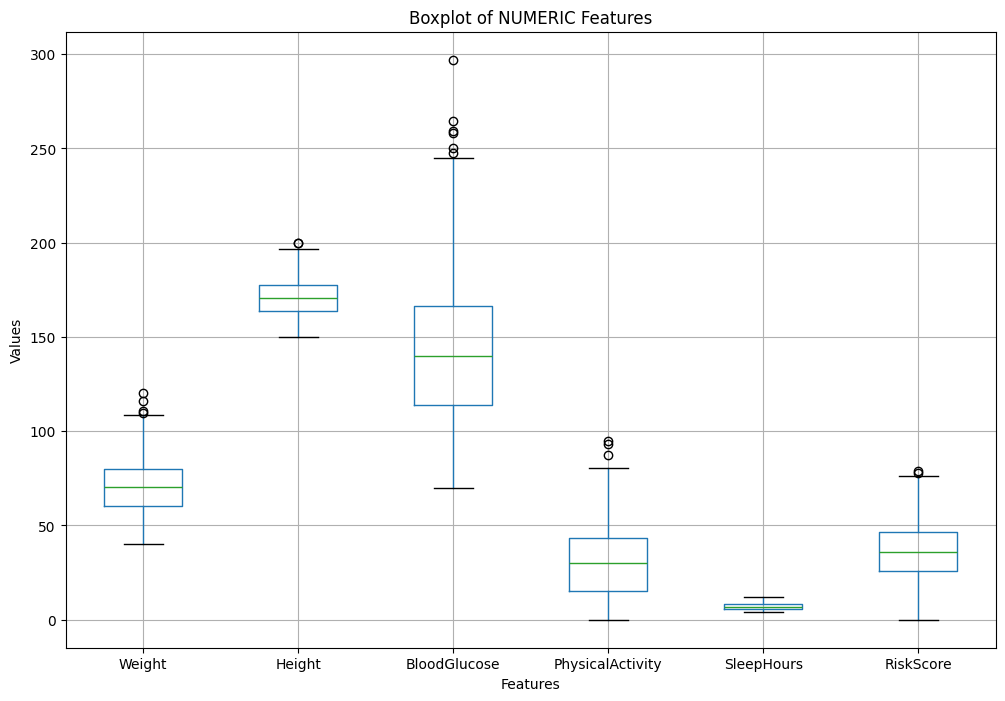

In [11]:
plt.figure(figsize=(12, 8))
temp_df.boxplot()
plt.title('Boxplot of NUMERIC Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

نزدیک بودن میانه و میانگین لزوما به این معنی نیست که داده پرت وجود ندارد.

## Feature Engineering

### BMI

In [12]:
dataset['BMI'] = dataset['Weight'] / ((dataset['Height']/100) ** 2)

### Sleep Quality

- IF:
 - `Stress Level = 0 ==> SleepHour / (StressLevel + 1.3)`
 - `Stress Level = 1 or 2 ==> SleepHour / (StressLevel + 1.1)`

In [13]:
temp_list = []
for i in range(dataset.shape[0]):
    if dataset['StressLevel'].iloc[i] == 0:
        temp_list.append(dataset['SleepHours'].iloc[i]/1.3)

    if dataset['StressLevel'].iloc[i] == 1:
        temp_list.append(dataset['SleepHours'].iloc[i]/2.1)

    if dataset['StressLevel'].iloc[i] == 2:
        temp_list.append(dataset['SleepHours'].iloc[i]/3.1)

dataset['SleepQuality'] = temp_list

### Physical Health

- IF:
 - `Hydration Level = 0 ==> PhysicalActivity * 1`
 - `Hydration Level = 1 ==> PhysicalActivity * 1.4`

In [14]:
temp_list = []
for i in range(dataset.shape[0]):
    if dataset['HydrationLevel'].iloc[i] == 1:
        temp_list.append(dataset['PhysicalActivity'].iloc[i] * 1.4)

    else:
        temp_list.append(dataset['PhysicalActivity'].iloc[i])

dataset['PhysicalHealth'] = temp_list

### Glucose Management Score

- IF:
 - `BloodGlucose <= 140 ==> Normal People`
   - IF:
        - `MedicationAdherence = 1 ==> [3 - (BloodGlucose / 100)] * 7`
        - `MedicationAdherence = 0 ==> [3 - (BloodGlucose / 100)] * 4.5`

 - `BloodGlucose >= 140 and BloodGlucose < 180 ==> Diabets`
   - IF:
        - `MedicationAdherence = 1 ==> [3 - (BloodGlucose / 100)] * 4.7`
        - `MedicationAdherence = 0 ==> [3 - (BloodGlucose / 100)] * 3`

 - `BloodGlucose >= 180 ==> High Risk`
   - IF:
        - `MedicationAdherence = 1 ==> [3 - (BloodGlucose / 100)] * 3.2`
        - `MedicationAdherence = 0 ==> [3 - (BloodGlucose / 100)] * 1.2`

In [15]:
temp_list = []
for i in range(dataset.shape[0]):
    # Normal People
    if dataset['BloodGlucose'].iloc[i] <= 140:
        if dataset['MedicationAdherence'].iloc[i] == 1:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 7)

        if dataset['MedicationAdherence'].iloc[i] == 0:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 4.5)

    # Diabets
    if dataset['BloodGlucose'].iloc[i] > 140 and dataset['BloodGlucose'].iloc[i] < 180:
        if dataset['MedicationAdherence'].iloc[i] == 1:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 4.7)

        if dataset['MedicationAdherence'].iloc[i] == 0:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 3)

    # High Risk
    if dataset['BloodGlucose'].iloc[i] >= 180:
        if dataset['MedicationAdherence'].iloc[i] == 1:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 3.2)

        if dataset['MedicationAdherence'].iloc[i] == 0:
            temp_list.append((3 - (dataset['BloodGlucose'].iloc[i])/100) * 1.2)

dataset['GlucoseScore'] = temp_list

In [16]:
dataset

,UserID,Weight,Height,BloodGlucose,PhysicalActivity,Diet,MedicationAdherence,StressLevel,SleepHours,HydrationLevel,RiskScore,Year,Month,Day,BMI,SleepQuality,PhysicalHealth,GlucoseScore
0,1,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,38.000000,2021,1,1,22.878113,3.020151,0.000000,8.415321
1,2,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,39.162310,2021,1,2,21.141495,3.438104,17.909220,11.604652
2,3,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,31.481633,2021,1,3,27.390667,4.613717,30.419045,13.418776
3,4,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,45.000000,2021,1,4,34.718614,3.789911,94.855254,7.754331
4,5,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,4.717234,2021,1,5,21.226675,5.211313,57.583487,16.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,17.357712,2023,12,26,20.146213,4.895345,42.796812,7.374337
996,997,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,73.000000,2023,12,27,33.656939,3.684177,0.000000,4.490697
997,998,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,70.921787,2023,12,28,30.644531,1.904762,33.031661,9.435169
998,999,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,10.000000,2023,12,29,21.670599,2.269632,88.014588,6.891748


## Correlation (Part2: After Feature Engineering)

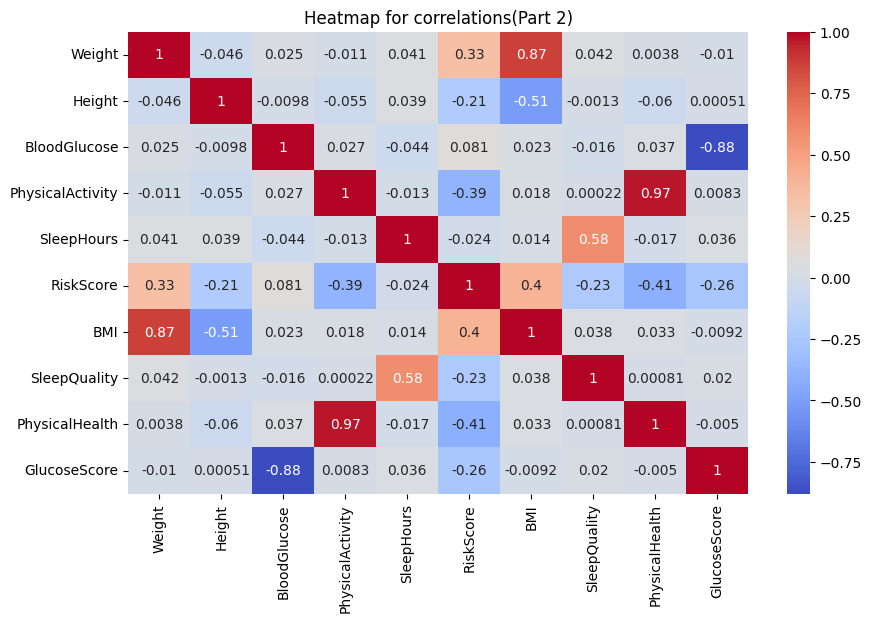

In [17]:
temp_df = dataset.drop(["UserID", "Diet", "HydrationLevel", "StressLevel", "MedicationAdherence", "Year", "Month", "Day"], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap for correlations(Part 2)")
plt.show()

`By looking at correlation of new features we can conclude that those are more effective on RiskScore.(Take a look at Physical Health and BMI)`

## Visualization

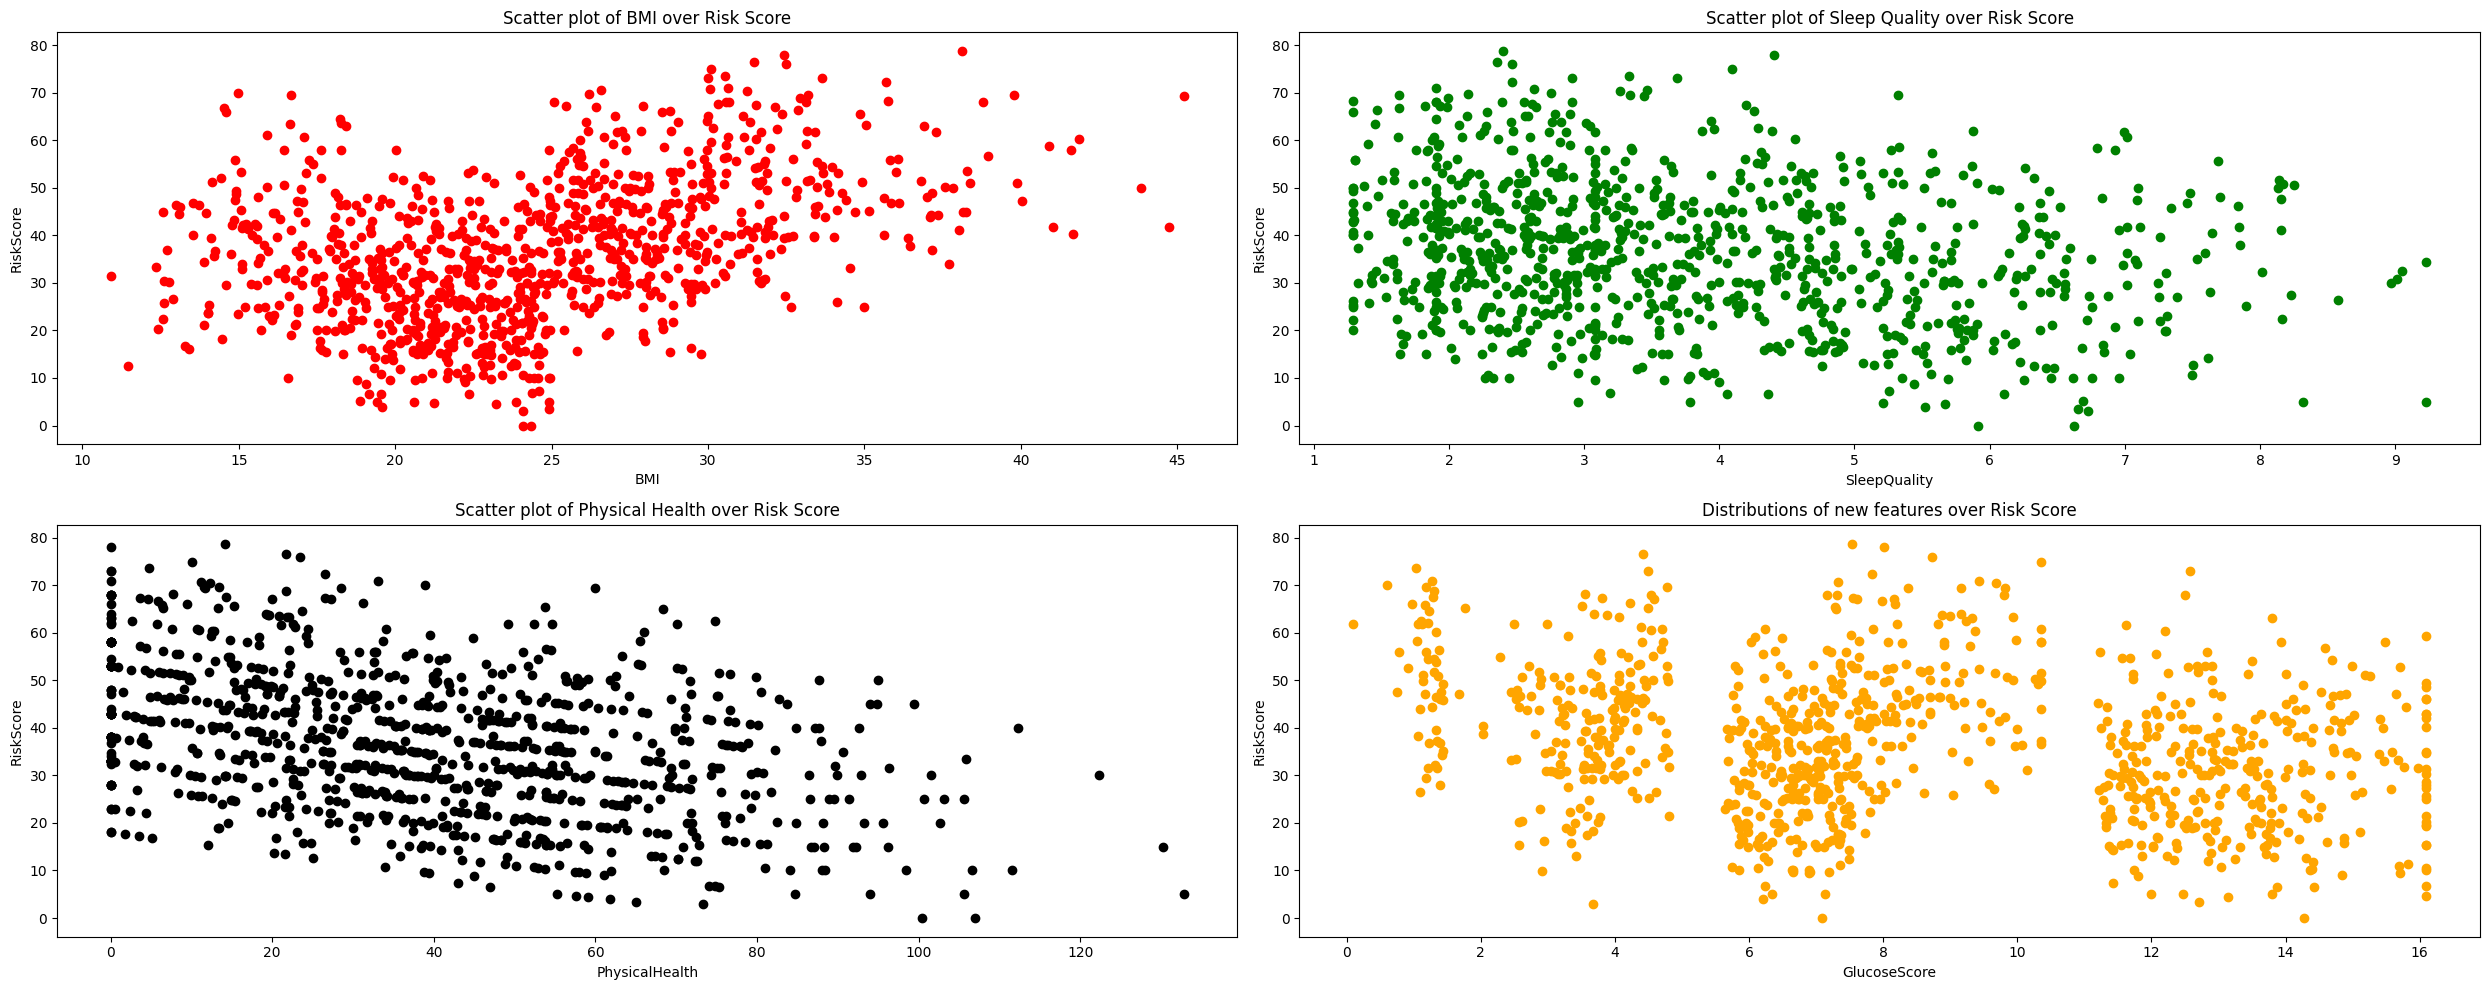

In [18]:
fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, figsize=(25, 10))

ax1.scatter(dataset['BMI'], dataset['RiskScore'], color='red')
ax1.set_title("Scatter plot of BMI over Risk Score")
ax1.set_xlabel("BMI")
ax1.set_ylabel("RiskScore")

ax2.scatter(dataset['SleepQuality'], dataset['RiskScore'], color='green')
ax2.set_title("Scatter plot of Sleep Quality over Risk Score")
ax2.set_xlabel("SleepQuality")
ax2.set_ylabel("RiskScore")

ax3.scatter(dataset['PhysicalHealth'], dataset['RiskScore'], color='black')
ax3.set_title("Scatter plot of Physical Health over Risk Score")
ax3.set_xlabel("PhysicalHealth")
ax3.set_ylabel("RiskScore")

ax4.scatter(dataset['GlucoseScore'], dataset['RiskScore'], color='orange')
ax4.set_title("Scatter plot of Glucose Score over Risk Score")
ax4.set_xlabel("GlucoseScore")
ax4.set_ylabel("RiskScore")

plt.title("Distributions of new features over Risk Score")
plt.tight_layout()
plt.show()

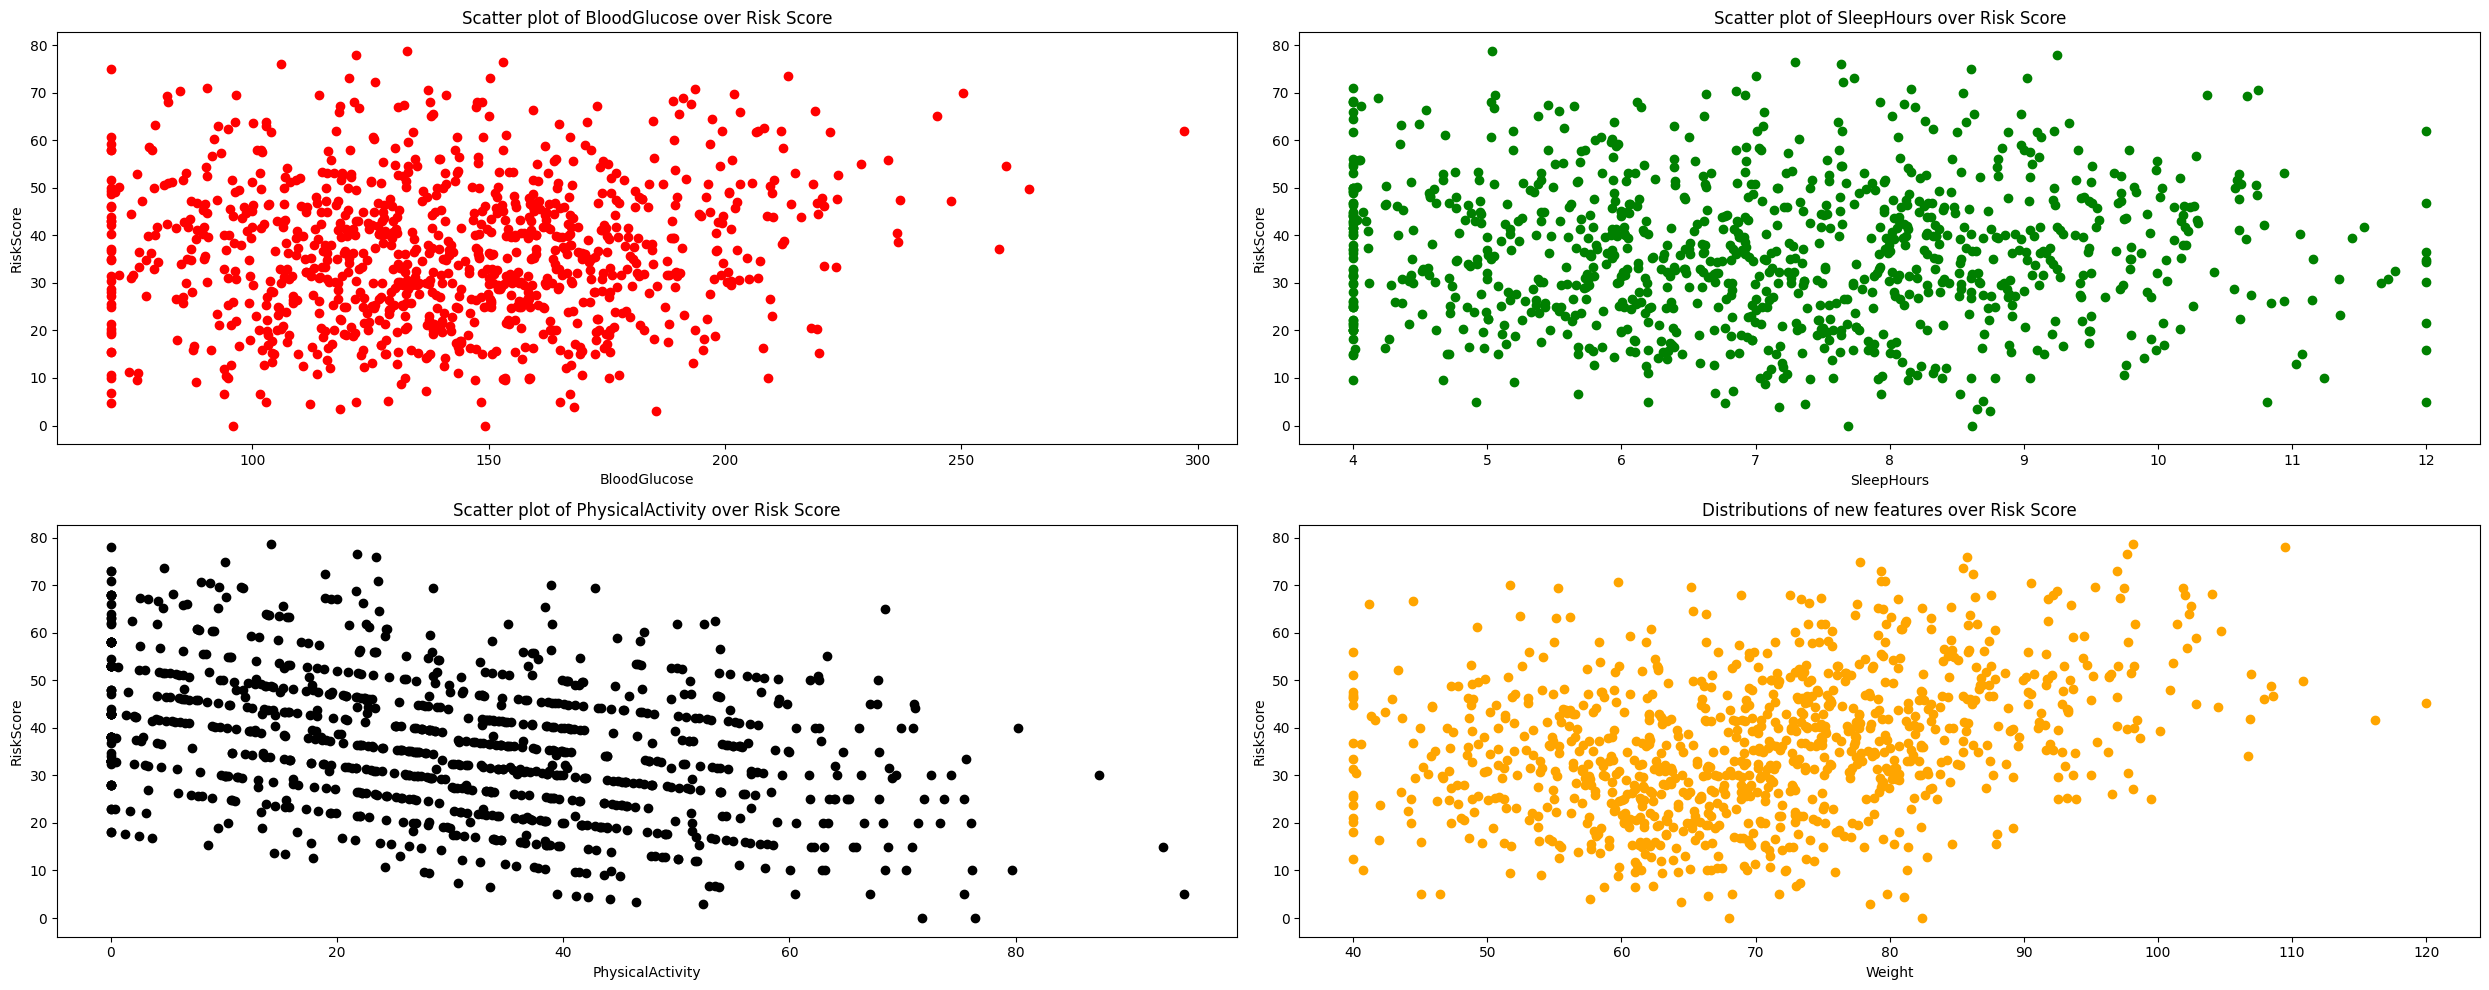

In [19]:
fig, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, figsize=(25, 10))

ax1.scatter(dataset['BloodGlucose'], dataset['RiskScore'], color='red')
ax1.set_title("Scatter plot of BloodGlucose over Risk Score")
ax1.set_xlabel("BloodGlucose")
ax1.set_ylabel("RiskScore")

ax2.scatter(dataset['SleepHours'], dataset['RiskScore'], color='green')
ax2.set_title("Scatter plot of SleepHours over Risk Score")
ax2.set_xlabel("SleepHours")
ax2.set_ylabel("RiskScore")

ax3.scatter(dataset['PhysicalActivity'], dataset['RiskScore'], color='black')
ax3.set_title("Scatter plot of PhysicalActivity over Risk Score")
ax3.set_xlabel("PhysicalActivity")
ax3.set_ylabel("RiskScore")

ax4.scatter(dataset['Weight'], dataset['RiskScore'], color='orange')
ax4.set_title("Scatter plot of Weight over Risk Score")
ax4.set_xlabel("Weight")
ax4.set_ylabel("RiskScore")

plt.title("Distributions of new features over Risk Score")
plt.tight_layout()
plt.show()

## Normalization(Z-Score)

In [20]:
scaler = StandardScaler()
normalized_df = dataset.copy()
normalized_df['Weight'] = scaler.fit_transform(dataset[['Weight']])
normalized_df['Height'] = scaler.fit_transform(dataset[['Height']])
normalized_df['BloodGlucose'] = scaler.fit_transform(dataset[['BloodGlucose']])
normalized_df['PhysicalActivity'] = scaler.fit_transform(dataset[['PhysicalActivity']])
normalized_df['SleepHours'] = scaler.fit_transform(dataset[['SleepHours']])
normalized_df['RiskScore'] = scaler.fit_transform(dataset[['RiskScore']])
normalized_df['BMI'] = scaler.fit_transform(dataset[['BMI']])
normalized_df['SleepQuality'] = scaler.fit_transform(dataset[['SleepQuality']])
normalized_df['PhysicalHealth'] = scaler.fit_transform(dataset[['PhysicalHealth']])
normalized_df['GlucoseScore'] = scaler.fit_transform(dataset[['GlucoseScore']])

In [21]:
normalized_df

,UserID,Weight,Height,BloodGlucose,PhysicalActivity,Diet,MedicationAdherence,StressLevel,SleepHours,HydrationLevel,RiskScore,Year,Month,Day,BMI,SleepQuality,PhysicalHealth,GlucoseScore
0,1,0.490245,1.355319,-0.731395,-1.570028,1,0,1,-0.389824,1,0.105965,2021,1,1,-0.256680,-0.452251,-1.513631,0.013759
1,2,-0.168449,0.867828,-0.173469,-0.907061,0,1,2,1.902297,1,0.184022,2021,1,2,-0.552555,-0.207451,-0.817583,0.789018
2,3,0.646859,-0.020443,-0.854661,-0.443969,1,1,0,-0.572780,1,-0.331786,2021,1,3,0.512143,0.481117,-0.331384,1.229994
3,4,1.554894,-0.746015,-0.345310,1.941346,1,0,1,0.468696,1,0.576061,2021,1,4,1.760636,-0.001394,2.172951,-0.146914
4,5,-0.267920,0.635327,-1.861444,0.561611,1,1,0,-0.160182,1,-2.129192,2021,1,5,-0.538042,0.831136,0.724371,1.881743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,-0.316620,1.017259,0.059937,0.014234,0,1,0,-0.378336,1,-1.280301,2023,12,26,-0.722125,0.646070,0.149682,-0.239282
996,997,1.839808,-0.108912,0.249472,-1.570028,0,0,1,0.350769,1,2.456446,2023,12,27,1.579754,-0.063324,-1.513631,-0.940234
997,998,0.639757,-0.987273,-1.327090,-0.347254,0,0,1,-1.633827,1,2.316880,2023,12,28,1.066517,-1.105546,-0.229844,0.261663
998,999,-0.617533,-0.249130,0.329823,1.688116,1,1,2,-0.021484,1,-1.774420,2023,12,29,-0.462409,-0.891837,1.907086,-0.356589


# Part2) Linear Regression

## Linear Regression(First Try)

In [22]:
X = normalized_df[['Weight', 'Height', 'BloodGlucose', 'BMI']]
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

model = LinearRegression()

model.fit(x_train, y_train)

yhat = model.predict(x_test)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Squared Error: {round(mse, 3)}, R^2 Score: {round(r2, 3)}")

Mean Squared Error: 0.894, R^2 Score: 0.116


## Linear Regression(Second Try)

Let's test our features

In [23]:
X = normalized_df[['PhysicalHealth', 'SleepQuality', 'GlucoseScore', 'BMI']]
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
model = LinearRegression()

model.fit(x_train, y_train)

yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Squared Error: {round(mse, 3)}, R^2 Score: {round(r2, 3)}")

Mean Squared Error: 0.614, R^2 Score: 0.392


## Linear Regression(Third Try)


In [24]:
X = normalized_df.drop('RiskScore', axis=1)
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
model = LinearRegression()

model.fit(x_train, y_train)

yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Squared Error: {round(mse, 3)}, R^2 Score: {round(r2, 3)}")

Mean Squared Error: 0.23, R^2 Score: 0.772


Better result ^^

## Ridge

### First Try

In [25]:
X = normalized_df[['Weight', 'Height', 'BloodGlucose', 'BMI']]
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

model = Ridge(alpha=0.2)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MSR is: {round(mse, 3)}, and R2 is: {round(r2, 3)}")

MSR is: 0.893, and R2 is: 0.116


### Second Try

In [26]:
X = normalized_df[['PhysicalHealth', 'SleepQuality', 'GlucoseScore', 'BMI']]
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

model = Ridge(alpha=0.2)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MSR is: {round(mse, 3)}, and R2 is: {round(r2, 3)}")

MSR is: 0.614, and R2 is: 0.392


- `Ridge Regression doesn't have much effect because it's use for overfitting and highly correlated features. In our case we don't have any overfitting or highly correlation.`

### Third Try

In [27]:
X = normalized_df.drop('RiskScore', axis=1)
Y = normalized_df['RiskScore']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
model = Ridge(alpha=0.2)

model.fit(x_train, y_train)

yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"Mean Squared Error: {round(mse, 3)}, R^2 Score: {round(r2, 3)}")

Mean Squared Error: 0.231, R^2 Score: 0.771


## PCA

### Determine the best N for the dataset

In [28]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

In [29]:
pca = PCA()
pca.fit(temp_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

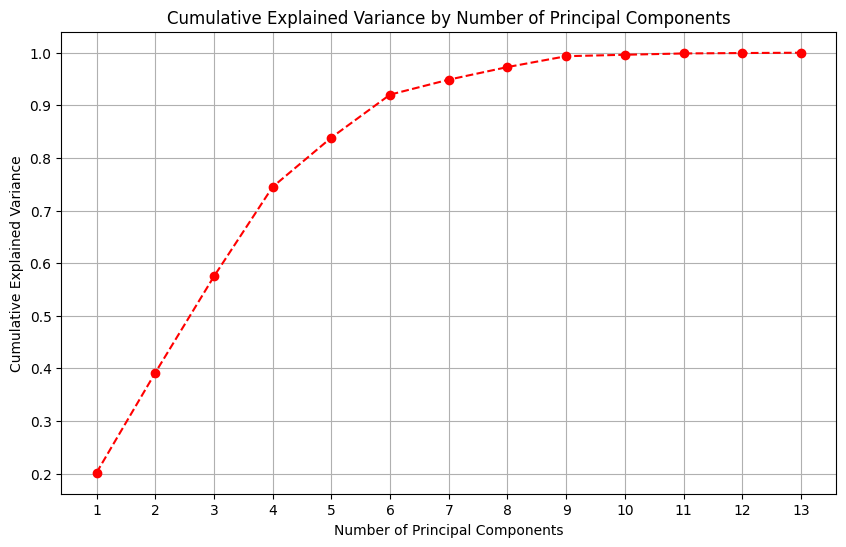

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red')
plt.xticks(np.arange(1, 14, 1))
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

- `By having n_components = 6, we can cover over 90% of varianve(or information) of the dataset.`

### Create A Regression Model On New Features

In [31]:
pca = PCA(n_components=6)
pca_table = pca.fit_transform(temp_df)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(pca_table, normalized_df["RiskScore"], test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
print(f"MSE is: {round(mse,3)}, and r2 is: {round(r2, 3)}")

MSE is: 0.599, and r2 is: 0.407


# Part3) Logistic Regression

## Binary Classification

In [33]:
Binary_risk = dataset.copy()
for i in range(dataset.shape[0]):
    if dataset['RiskScore'].iloc[i] <= 50:
        Binary_risk['RiskScore'].iloc[i] = 0
    else:
        Binary_risk['RiskScore'].iloc[i] = 1

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Binary_risk['RiskScore'].iloc[i] = 0
<ipython-input-33-c09310bc42a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Binary_risk['RiskScore'].iloc[i] = 0
<ipython-input-33-c09310bc42a7>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when yo

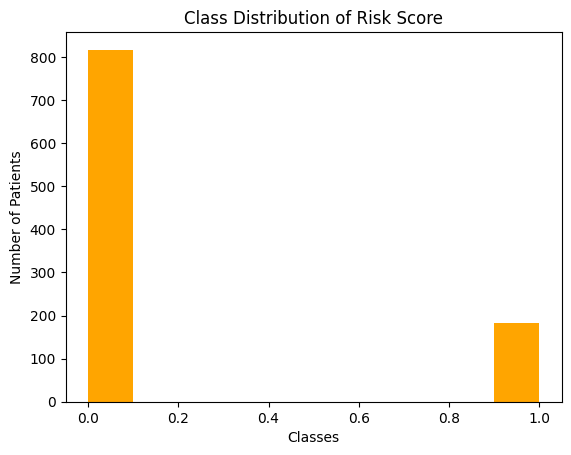

In [34]:
temp_df = Binary_risk['RiskScore']

plt.hist(temp_df, color="orange")
plt.title("Class Distribution of Risk Score")
plt.xlabel("Classes")
plt.ylabel("Number of Patients")
plt.show()

- `Almost 80% of data is in class 0(low risk)`

### First Try

In [35]:
temp_df = normalized_df[["BMI", "BloodGlucose", "StressLevel", "SleepHours"]]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)

model = LogisticRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

In [36]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.805
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       162
         1.0       0.43      0.08      0.13        38

    accuracy                           0.81       200
   macro avg       0.62      0.53      0.51       200
weighted avg       0.74      0.81      0.75       200



### Second Try

In [37]:
temp_df = normalized_df[["BMI", "SleepQuality", "PhysicalHealth", "GlucoseScore"]]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)

model = LogisticRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

In [38]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.85
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       162
         1.0       0.75      0.32      0.44        38

    accuracy                           0.85       200
   macro avg       0.80      0.65      0.68       200
weighted avg       0.84      0.85      0.82       200



- `Again! Our new features have the better results.`

## Third Try

In [39]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)

model = LogisticRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.905
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       162
         1.0       0.85      0.61      0.71        38

    accuracy                           0.91       200
   macro avg       0.88      0.79      0.83       200
weighted avg       0.90      0.91      0.90       200



# Part4) Random Forest & Decision Tree

## Decision Tree

### Part 1 => max depth = 3

In [40]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.845
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       162
         1.0       0.57      0.74      0.64        38

    accuracy                           0.84       200
   macro avg       0.75      0.80      0.77       200
weighted avg       0.86      0.84      0.85       200



### Part 2 => max depth = 5

In [41]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

In [43]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.89
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       162
         1.0       0.75      0.63      0.69        38

    accuracy                           0.89       200
   macro avg       0.83      0.79      0.81       200
weighted avg       0.89      0.89      0.89       200



### Part 3 => max depth = 10

In [44]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.9
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       162
         1.0       0.71      0.79      0.75        38

    accuracy                           0.90       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.90      0.90      0.90       200



### Part 4 => max depth = 15

In [45]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = DecisionTreeClassifier(max_depth=15)
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.895
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       162
         1.0       0.71      0.76      0.73        38

    accuracy                           0.90       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.90      0.90      0.90       200



## Random Forest

In [46]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = RandomForestClassifier()
model.fit(x_train, y_train)

yhat = model.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

In [48]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.905
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       162
         1.0       0.95      0.53      0.68        38

    accuracy                           0.91       200
   macro avg       0.93      0.76      0.81       200
weighted avg       0.91      0.91      0.89       200



### Our Features

In [49]:
temp_df = normalized_df[['GlucoseScore', 'PhysicalHealth', 'SleepQuality', 'BMI']]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = RandomForestClassifier()
model.fit(x_train, y_train)

yhat = model.predict(x_test)
accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.875
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       162
         1.0       0.76      0.50      0.60        38

    accuracy                           0.88       200
   macro avg       0.83      0.73      0.76       200
weighted avg       0.87      0.88      0.86       200



# SVM & Cross Validation

## Support Vector Machine (SVM)

### Kernel => Linear

In [50]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = SVC(kernel='linear')
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.915
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       162
         1.0       0.84      0.68      0.75        38

    accuracy                           0.92       200
   macro avg       0.88      0.83      0.85       200
weighted avg       0.91      0.92      0.91       200



### Our features

In [51]:
temp_df = normalized_df[['GlucoseScore', 'PhysicalHealth', 'SleepQuality', 'BMI']]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = SVC(kernel='linear')
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.85
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       162
         1.0       0.72      0.34      0.46        38

    accuracy                           0.85       200
   macro avg       0.79      0.66      0.69       200
weighted avg       0.84      0.85      0.83       200



### Kernel => Polynomial

In [52]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = SVC(kernel='poly')
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.895
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       162
         1.0       0.81      0.58      0.68        38

    accuracy                           0.90       200
   macro avg       0.86      0.77      0.81       200
weighted avg       0.89      0.90      0.89       200



### Kernel => RBF

In [53]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

yhat = model.predict(x_test)

accuracy = accuracy_score(y_test, yhat)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(class_report)

Accuracy: 0.91
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       162
         1.0       0.88      0.61      0.72        38

    accuracy                           0.91       200
   macro avg       0.90      0.79      0.83       200
weighted avg       0.91      0.91      0.90       200



## Cross Validation(k_fold)

In [54]:
temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train = temp_df
y_train = Binary_risk["RiskScore"]

model = SVC(kernel='linear')

scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

average_accuracy = scores.mean()
std_deviation = scores.std()

print(f"Average Accuracy: {round(average_accuracy, 3)}")
print(f"Average std: {round(std_deviation, 3)}")

Average Accuracy: 0.906
Average std: 0.015


# Optional

In [59]:
pca = PCA(n_components=10)
pca_table = pca.fit_transform(temp_df)

x_train, x_test, y_train, y_test = train_test_split(pca_table, normalized_df["RiskScore"], test_size=0.2, random_state=5)
model = LinearRegression()
model.fit(x_train, y_train)
yhat = model.predict(x_test)
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"MSE is: {round(mse,3)}, and r2 is: {round(r2, 3)}")

MSE is: 0.266, and r2 is: 0.737


### Neural Network First Try




In [76]:
import numpy as np
import tensorflow as tf
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train = temp_df
y_train = Binary_risk["RiskScore"]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)

model = Sequential([
    Dense(32, input_dim=len(x_train.columns), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")



Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7707 - loss: 0.6078   
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4903 
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.4035 
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3404  
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8907 - loss: 0.2981  
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.2699 
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2502  
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.2349 
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9077 - loss: 0.2224 
Epoch 10/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9136 - loss: 0.2117  
Epoch 11/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9166 - loss: 0.2022 
Epoch 12/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.920

### Neural Network Second Try

In [77]:
import numpy as np
import tensorflow as tf
import random

# Set random seeds for reproducibility
np.random.seed(50)
tf.random.set_seed(50)
random.seed(50)

temp_df = normalized_df.drop(["UserID", "RiskScore", "Year", "Month", "Day"], axis=1)

x_train = temp_df
y_train = Binary_risk["RiskScore"]

x_train, x_test, y_train, y_test = train_test_split(temp_df, Binary_risk["RiskScore"], test_size=0.2, random_state=5)

model = Sequential([
    Dense(16, input_dim=len(x_train.columns), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=32, batch_size=10, verbose=1)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")



Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6745 - loss: 0.6528
Epoch 2/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4620
Epoch 3/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8176 - loss: 0.3671
Epoch 4/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8344 - loss: 0.3174
Epoch 5/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8696 - loss: 0.2805
Epoch 6/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8849 - loss: 0.2546
Epoch 7/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.2354
Epoch 8/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9049 - loss: 0.2202
Epoch 9/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.2068
Epoch 10/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9126 - loss: 0.1959
Epoch 11/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 0.1866
Epoch 12/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9195 - loss: 0.1792
